![CAO](https://upload.wikimedia.org/wikipedia/commons/5/51/Central_Applications_Office.png)

# CAO Points Analysis

<br>

In this notebook we will learn how to:
- Load the **CAO points** information from the CAO website into a pandas data frame. This will cover the points from the year 2019 to 2021.
- Create a detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in **pandas**.
- Use **plots** and other visualisations to show the data analysis.

***
## Imports
***

The following imports are required to run this notebook.

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Numerical arrays
import numpy as np

# Import Pandas
import pandas as pd

# Dates and times.
import datetime as dt

#import csv
import csv

#import camelot
import camelot

# For downloading.
import urllib.request as urlrq

# plotting
import matplotlib.pyplot as plt

# Magic function 
%matplotlib inline

# Change default style sheet
plt.style.use('fivethirtyeight')

# Change the default parameters
plt.rcParams['figure.figsize'] = [10, 6]

# Seaborn plots
import seaborn as sns

Please note that for the **2019 points** you will need to download and Install [Ghostscript](https://www.ghostscript.com/releases/gsdnld.html) and you will also need to install [Camelot](https://camelot-py.readthedocs.io/en/master/). The instructions for these two requirements can be found in the **2019 points** section of this noteboook.

### Code for Creating File Paths

The below code is used to generate the file paths for saving the original date for the CAO points. We will use `datetime.datetime.now` which generates a timestamp from the moment in t. [15] We will then use `strftime` to create a string with the timestamp as the name. [16] The variable `nowstr` (Now String) will be used in the file paths to save original data to the data folder in this repository.

In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
# This will be used as a timestamp in the saved files
nowstr = now.strftime('%Y%m%d_%H%M%S')

***
## 2021 Points

http://www.cao.ie/index.php?page=points&p=2021
***

In [3]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Have a quick peek. 200 means OK.
resp

<Response [200]>

Now we need to create a file path to save the original data using the **timestamp** that we created above as the filename. This will save the original data to the data folder in this repository. This method means that we will never overwrite our original data because the filename will always be different if at least a second has passed since the last time `path2021` was run.

In [4]:
# Create a file path for the original data.
path2021 = 'data/cao2021_' + nowstr + '.html'

In [5]:
# The server uses the wrong encoding, fix it.
original_encoding = resp.encoding

# Change to cp1252.
resp.encoding = 'cp1252'

In [6]:
# Save the original html file.
with open(path2021, 'w') as f:
    f.write(resp.text)

Compile the regular expression for matching lines. r' means raw string notation. [01] This regular expression means that we are looking for 2
characer set of upper case letters from A-Z. The {}'s denote how many
occurnaces of the character set we are looking for. This is followed by 3
groups. Groups allow us to match several different patterns. The first group
is any character except a newline (.) with 0 or more repetitions (*). The
second group is 3 digits (\d{3}). The third group is a literal * which is
optional. The ? denotes that it is optional.

In [7]:
re_course = re.compile(r'([A-Z]{2}\d{3})  (.*)')

### Loop through the lines of the response
***

In [8]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [9]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [10]:
df2021 = pd.read_csv(path2021, encoding='cp1252')
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


### Cleaning up the Data

We will now rename the columns of the dataframe. We will use the same naming convention for each year. This is firstly to make the data look neater, and also so that when we use methods like `pd.sort_values()` later on, we will be able to sort the data alphabetically by their course codes. To rename the columns, we will use the method of assigning a list of new column names. We will rename the columns by directly assigning a list containing the new names to the `columns` attribute of the `df2021` object. [17]

In [11]:
df2021.columns = ['code', 'title', 'points_r1', 'points_r2']
df2021

,code,title,points_r1,points_r2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [12]:
df2021.iloc[7]

code                   AL830
title        General Nursing
points_r1               451*
points_r2                444
Name: 7, dtype: object

In [13]:
df2021.iloc[33]

code                   CW038
title        Art (portfolio)
points_r1               #700
points_r2                NaN
Name: 33, dtype: object

In [14]:
df2021.iloc[842]

code                                                     MH801
title        Early Childhood - Teaching and Learning (part-...
points_r1                                                  AQA
points_r2                                                  AQA
Name: 842, dtype: object

In [15]:
df2021['points_r1'] = df2021['points_r1'].astype(str)
df2021['points_r2'] = df2021['points_r2'].astype(str)

In [16]:
def points_r1_info(x):
    if r'*' in x['points_r1']:
        return 'Randomly Selected'
    elif r'#' in x['points_r1']:
        return 'Test/Portfolio'
    elif r'AQA' in x['points_r1']:
        return 'All Qualified Applicants'
    else:
        return ''

def points_r2_info(x):
    if r'*' in x['points_r1']:
        return 'Randomly Selected'
    elif r'#' in x['points_r1']:
        return 'Test/Portfolio'
    elif r'AQA' in x['points_r1']:
        return 'All Qualified Applicants'
    else:
        return ''

In [17]:
df2021['points_r1_info'] = df2021.apply (lambda x: points_r1_info(x), axis = 1)
df2021['points_r2_info'] = df2021.apply (lambda x: points_r2_info(x), axis = 1)
df2021

,code,title,points_r1,points_r2,points_r1_info,points_r2_info
0,AL801,Software Design for Virtual Reality and Gaming,300,nan,,
1,AL802,Software Design in Artificial Intelligence for...,313,nan,,
2,AL803,Software Design for Mobile Apps and Connected ...,350,nan,,
3,AL805,Computer Engineering for Network Infrastructure,321,nan,,
4,AL810,Quantity Surveying,328,nan,,
...,...,...,...,...,...,...
944,WD211,Creative Computing,270,nan,,
945,WD212,Recreation and Sport Management,262,nan,,
946,WD230,Mechanical and Manufacturing Engineering,230,230,,
947,WD231,Early Childhood Care and Education,266,nan,,


In [18]:
df2021.iloc[7]

code                          AL830
title               General Nursing
points_r1                      451*
points_r2                       444
points_r1_info    Randomly Selected
points_r2_info    Randomly Selected
Name: 7, dtype: object

In [19]:
#  [11]

df2021['points_r1'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)
df2021['points_r2'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)
df2021

,code,title,points_r1,points_r2,points_r1_info,points_r2_info
0,AL801,Software Design for Virtual Reality and Gaming,300,,,
1,AL802,Software Design in Artificial Intelligence for...,313,,,
2,AL803,Software Design for Mobile Apps and Connected ...,350,,,
3,AL805,Computer Engineering for Network Infrastructure,321,,,
4,AL810,Quantity Surveying,328,,,
...,...,...,...,...,...,...
944,WD211,Creative Computing,270,,,
945,WD212,Recreation and Sport Management,262,,,
946,WD230,Mechanical and Manufacturing Engineering,230,230,,
947,WD231,Early Childhood Care and Education,266,,,


In [20]:
df2021.iloc[842]

code                                                          MH801
title             Early Childhood - Teaching and Learning (part-...
points_r1                                                          
points_r2                                                          
points_r1_info                             All Qualified Applicants
points_r2_info                             All Qualified Applicants
Name: 842, dtype: object

### Data Types

In [21]:
# Check the data types [10]
df2021.dtypes

code              object
title             object
points_r1         object
points_r2         object
points_r1_info    object
points_r2_info    object
dtype: object

In [22]:
# change the points columns from object to float [09]

df2021['points_r1'] = pd.to_numeric(df2021['points_r1'])
df2021['points_r2'] = pd.to_numeric(df2021['points_r2'])
df2021

,code,title,points_r1,points_r2,points_r1_info,points_r2_info
0,AL801,Software Design for Virtual Reality and Gaming,300.0,NaN,,
1,AL802,Software Design in Artificial Intelligence for...,313.0,NaN,,
2,AL803,Software Design for Mobile Apps and Connected ...,350.0,NaN,,
3,AL805,Computer Engineering for Network Infrastructure,321.0,NaN,,
4,AL810,Quantity Surveying,328.0,NaN,,
...,...,...,...,...,...,...
944,WD211,Creative Computing,270.0,NaN,,
945,WD212,Recreation and Sport Management,262.0,NaN,,
946,WD230,Mechanical and Manufacturing Engineering,230.0,230.0,,
947,WD231,Early Childhood Care and Education,266.0,NaN,,


In [23]:
df2021.dtypes

code               object
title              object
points_r1         float64
points_r2         float64
points_r1_info     object
points_r2_info     object
dtype: object

### Save clean data

In [24]:
# Create a file path for the pandas data
path2021clean = 'data/cao2021_clean_csv_' + nowstr + '.csv'

In [25]:
# Save pandas data frame to disk
df2021.to_csv(path2021clean) 

<br>

## 2020 Points

https://www.cao.ie/index.php?page=points&p=2020
***

In [26]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

**Save Original File**

In [27]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [28]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20211228_233521.xlsx',
 <http.client.HTTPMessage at 0x1aaf8e671f0>)

## Load Spreadsheet using pandas

In [29]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows=10)

In [30]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Spot check a random row.
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [32]:
# Spot check the last row.
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [33]:
# Create a file path for the pandas data.
path = 'data/cao2020_' + nowstr + '.csv'

In [34]:
# Save pandas data frame to disk.
df2020.to_csv(path)

In [35]:
# Get rid of the level 7 courses [12]

df2020 = df2020.loc[df2020["LEVEL"] > 7]
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Arts,Arts (options),WD200,AQA,NaN,AQA,NaN,AQA,NaN,336,...,avp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df2020.columns

Index(['CATEGORY (i.e.ISCED description)', 'COURSE TITLE', 'COURSE CODE2',
       'R1 POINTS', 'R1 Random *', 'R2 POINTS', 'R2 Random*', 'EOS',
       'EOS Random *', 'EOS Mid-point', 'LEVEL', 'HEI', 'Test/Interview #',
       'avp', 'v', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8'],
      dtype='object')

In [37]:
pd.Series(df2020.columns)

0     CATEGORY (i.e.ISCED description)
1                         COURSE TITLE
2                         COURSE CODE2
3                            R1 POINTS
4                          R1 Random *
5                            R2 POINTS
6                           R2 Random*
7                                  EOS
8                         EOS Random *
9                        EOS Mid-point
10                               LEVEL
11                                 HEI
12                    Test/Interview #
13                                 avp
14                                   v
15                             Column1
16                             Column2
17                             Column3
18                             Column4
19                             Column5
20                             Column6
21                             Column7
22                             Column8
dtype: object

### Cleaning up the Data

In [38]:
# Select only Columns of Interest [11]

df2020 = df2020.loc[:, ['COURSE CODE2', 'COURSE TITLE', 'R1 POINTS', 'R2 POINTS', 'EOS', 'EOS Mid-point']]



In [39]:
# Rename the columns
df2020.columns = ['code', 'title', 'points_r1', 'points_r2', 'eos_points', 'mid-point']

df2020['points_r1'] = df2020['points_r1'].astype(str)
df2020['points_r2'] = df2020['points_r2'].astype(str)

df2020['points_r1_info'] = df2020.apply (lambda x: points_r1_info(x), axis = 1)
df2020['points_r2_info'] = df2020.apply (lambda x: points_r2_info(x), axis = 1)
df2020

,code,title,points_r1,points_r2,eos_points,mid-point,points_r1_info,points_r2_info
0,AC120,International Business,209,nan,209,280,,
1,AC137,Liberal Arts,252,nan,252,270,,
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,nan,#+matric,#+matric,Test/Portfolio,Test/Portfolio
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,nan,#+matric,#+matric,Test/Portfolio,Test/Portfolio
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,nan,#+matric,#+matric,Test/Portfolio,Test/Portfolio
...,...,...,...,...,...,...,...,...
1455,WD200,Arts (options),AQA,AQA,AQA,336,All Qualified Applicants,All Qualified Applicants
1460,WD210,Software Systems Development,279,nan,279,337,,
1461,WD211,Creative Computing,271,nan,271,318,,
1462,WD212,Recreation and Sport Management,270,nan,270,349,,


In [40]:
# Remove all non-numeric characters that appeared in the Points columns
df2020['points_r1'].replace('[a-z.#*+A-Z]', '',regex = True, inplace = True)
df2020['points_r2'].replace('[a-z.#*+A-Z]', '',regex = True, inplace = True)
df2020['eos_points'].replace('[a-z.#*+A-Z]', '',regex = True, inplace = True)
df2020['mid-point'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)

df2020

,code,title,points_r1,points_r2,eos_points,mid-point,points_r1_info,points_r2_info
0,AC120,International Business,209,,209,280,,
1,AC137,Liberal Arts,252,,252,270,,
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,,,,Test/Portfolio,Test/Portfolio
3,AD102,Graphic Design and Moving Image Design (portfo...,,,,,Test/Portfolio,Test/Portfolio
4,AD103,Textile & Surface Design and Jewellery & Objec...,,,,,Test/Portfolio,Test/Portfolio
...,...,...,...,...,...,...,...,...
1455,WD200,Arts (options),,,,336,All Qualified Applicants,All Qualified Applicants
1460,WD210,Software Systems Development,279,,279,337,,
1461,WD211,Creative Computing,271,,271,318,,
1462,WD212,Recreation and Sport Management,270,,270,349,,


### Data Types

In [41]:
# Check the data types [10]
df2020.dtypes

code              object
title             object
points_r1         object
points_r2         object
eos_points        object
mid-point         object
points_r1_info    object
points_r2_info    object
dtype: object

In [42]:
# change the points columns from object to float [09]

df2020['points_r1'] = pd.to_numeric(df2020['points_r1'])
df2020['points_r2'] = pd.to_numeric(df2020['points_r2'])
df2020['eos_points'] = pd.to_numeric(df2020['eos_points'])
df2020['mid-point'] = pd.to_numeric(df2020['mid-point'])
df2020

,code,title,points_r1,points_r2,eos_points,mid-point,points_r1_info,points_r2_info
0,AC120,International Business,209.0,NaN,209.0,280.0,,
1,AC137,Liberal Arts,252.0,NaN,252.0,270.0,,
2,AD101,"First Year Art & Design (Common Entry,portfolio)",NaN,NaN,NaN,NaN,Test/Portfolio,Test/Portfolio
3,AD102,Graphic Design and Moving Image Design (portfo...,NaN,NaN,NaN,NaN,Test/Portfolio,Test/Portfolio
4,AD103,Textile & Surface Design and Jewellery & Objec...,NaN,NaN,NaN,NaN,Test/Portfolio,Test/Portfolio
...,...,...,...,...,...,...,...,...
1455,WD200,Arts (options),NaN,NaN,NaN,336.0,All Qualified Applicants,All Qualified Applicants
1460,WD210,Software Systems Development,279.0,NaN,279.0,337.0,,
1461,WD211,Creative Computing,271.0,NaN,271.0,318.0,,
1462,WD212,Recreation and Sport Management,270.0,NaN,270.0,349.0,,


In [43]:
df2020.dtypes

code               object
title              object
points_r1         float64
points_r2         float64
eos_points        float64
mid-point         float64
points_r1_info     object
points_r2_info     object
dtype: object

### Save Clean Data

In [44]:
# Create a file path for the pandas data
path2020clean = 'data/cao2020_clean_csv_' + nowstr + '.csv'

In [45]:
# Save pandas data frame to disk
df2020.to_csv(path2020clean) 

<br>

## 2019 Points
https://www.cao.ie/index.php?page=points&p=2019
***

**_Step to reproduce_**
<br>

1. Download and Install [Ghostscript](https://www.ghostscript.com/releases/gsdnld.html). Choose public license 64 bit.
2. Install [Camelot](https://camelot-py.readthedocs.io/en/master/) using the command ``conda install -c conda-forge camelot-py`` in cmder.
3. Import the Camelot package using the command ``import camelot`` as seen in the import cell at the top of this project.
4. Create a **[TableList](https://camelot-py.readthedocs.io/en/master/api.html#camelot.core.TableList)** object called ``tables``, which is a list of Table objects using the file path of the 2019 data as seen below.
5. Seince there are 18 pages in this PDF, Set ``the read_pdf`` parameter as a range from 1-18 

In [46]:
tables = camelot.read_pdf('data/cao2019_20211104_143030.pdf', pages = '1-18')

In [47]:
tables

<TableList n=18>

Above, we can see that the tables object has 18 tables, since n=18.

In [48]:
type(tables)

camelot.core.TableList

To access a table by using its index. We can select a table passing the index.

In [49]:
tables[0]

<Table shape=(44, 4)>

The above is the first table on the PDF file. We can also see the shape of the table, 4 rows and 44 columns. The next thing to do is to make an object for each table index below so that we can use pandas to concatonate all of the tables.

In [50]:
table_1 = tables[0]
table_2 = tables[1]
table_3 = tables[2]
table_4 = tables[3]
table_5 = tables[4]
table_6 = tables[5]
table_7 = tables[6]
table_8 = tables[7]
table_9 = tables[8]
table_10 = tables[9]
table_11 = tables[10]
table_12 = tables[11]
table_13 = tables[12]
table_14 = tables[13]
table_15 = tables[14]
table_16 = tables[15]
table_17 = tables[16]
table_18 = tables[17]

Let's take a look at the first and last tables using the df function in Camelot.

In [51]:
table_1.df

,0,1,2,3
0,Course Code INSTITUTION and COURSE,,EOS,Mid
1,,Athlone Institute of Technology,,
2,AL801,Software Design with Virtual Reality and Gaming,304,328
3,AL802,Software Design with Cloud Computing,301,306
4,AL803,Software Design with Mobile Apps and Connected...,309,337
5,AL805,Network Management and Cloud Infrastructure,329,442
6,AL810,Quantity Surveying,307,349
7,AL820,Mechanical and Polymer Engineering,300,358
8,AL830,General Nursing,410,429
9,AL832,Psychiatric Nursing,387,403


In [52]:
table_18.df

,0,1,2,3
0,TL881,Social Care,308,356
1,TL889,Counselling with Addiction - Mature applicants...,#,
2,TL890,General Nursing and Mature Applicants,407,431
3,TL891,Mental Health Nursing and Mature Applicants,367*,379
4,,Waterford Institute of Technology,,
5,WD001,Applied Computing (options),279,358
6,WD002,Science (options),302,377
7,WD005,Health Sciences (options),288,347
8,WD006,Exercise Sciences (options),282,337
9,WD007,Engineering (options),287,382


We need to drop the rows that are not course names (Name of the college and the first row in table_1 which is just the headers which we will write ourselves later. To do this, take a look at each table and find the indexes that need to be dropped.for table_1 we need to drop indexes 0, 1 and 29. I will just show how the first table because the process just needs to be repeated for the rest of the tables.

In [53]:
# Dropped the indexes that we do not need
table_1.df.drop([0, 1, 29])

,0,1,2,3
2,AL801,Software Design with Virtual Reality and Gaming,304,328
3,AL802,Software Design with Cloud Computing,301,306
4,AL803,Software Design with Mobile Apps and Connected...,309,337
5,AL805,Network Management and Cloud Infrastructure,329,442
6,AL810,Quantity Surveying,307,349
7,AL820,Mechanical and Polymer Engineering,300,358
8,AL830,General Nursing,410,429
9,AL832,Psychiatric Nursing,387,403
10,AL836,Nutrition and Health Science,352,383
11,AL837,Sports Science with Exercise Physiology,351,392


Once we know which rows to drop we then need to make the drop operations that we just performed permanent since these operations are not inplace. To do this we need to perform the operation for each table and then assign the operations back to the original variables as seen below. We could use the ``inplace = True`` option of the function, but this example it is neater to assign the operations back to the original variable i.e. the tables.

In [54]:
# Assign the drop operations back to the original variables.
table_1 = table_1.df.drop([0, 1, 29])
table_2 = table_2.df.drop([19, 23])
table_3 = table_3.df.drop([12])
table_4 = table_4.df.drop([20, 23, 25, 32])
table_5 = table_5.df.drop([1])
table_6 = table_6.df.drop([12])
table_7 = table_7.df.drop([27, 45])
table_8 = table_8.df.drop([9, 13, 32])
table_9 = table_9.df.drop([2, 13, 22, 27])
table_10 = table_10.df.drop([30])
table_11 = table_11.df.drop([17, 40])
table_12 = table_12.df.drop([33])
table_13 = table_13.df.drop([45])
table_14 = table_14.df.drop([10, 24, 22])
table_15 = table_15.df.drop([21])
table_16 = table_16.df.drop([8, 11, 47])
table_17 = table_17.df.drop([0, 33])
table_18 = table_18.df.drop([4])

We can now make an dataframe using the concatonate function in pandas.

In [55]:
df2019 = pd.concat([table_1, table_2, table_3, table_4, table_5,
                    table_6, table_7, table_8, table_9, table_10,
                    table_11, table_12, table_13, table_14, table_15,
                    table_16, table_17, table_18], ignore_index = True)

In [56]:
df2019.columns = ['code', 'title', 'points_r1', 'points_r2']
df2019

,code,title,points_r1,points_r2
0,AL801,Software Design with Virtual Reality and Gaming,304,328
1,AL802,Software Design with Cloud Computing,301,306
2,AL803,Software Design with Mobile Apps and Connected...,309,337
3,AL805,Network Management and Cloud Infrastructure,329,442
4,AL810,Quantity Surveying,307,349
...,...,...,...,...
925,WD200,Arts (options),221,296
926,WD210,Software Systems Development,271,329
927,WD211,Creative Computing,275,322
928,WD212,Recreation and Sport Management,274,311


### Cleaning Up the Data

In [57]:
df2019['points_r1'] = df2019['points_r1'].astype(str)
df2019['points_r2'] = df2019['points_r2'].astype(str)

In [58]:
df2019['points_r1_info'] = df2019.apply (lambda x: points_r1_info(x), axis = 1)
df2019['points_r2_info'] = df2019.apply (lambda x: points_r2_info(x), axis = 1)
df2019

,code,title,points_r1,points_r2,points_r1_info,points_r2_info
0,AL801,Software Design with Virtual Reality and Gaming,304,328,,
1,AL802,Software Design with Cloud Computing,301,306,,
2,AL803,Software Design with Mobile Apps and Connected...,309,337,,
3,AL805,Network Management and Cloud Infrastructure,329,442,,
4,AL810,Quantity Surveying,307,349,,
...,...,...,...,...,...,...
925,WD200,Arts (options),221,296,,
926,WD210,Software Systems Development,271,329,,
927,WD211,Creative Computing,275,322,,
928,WD212,Recreation and Sport Management,274,311,,


In [59]:
df2019.iloc[23]

code                                               AL861
title             Animation and Illustration (portfolio)
points_r1                                           #615
points_r2                                            899
points_r1_info                            Test/Portfolio
points_r2_info                            Test/Portfolio
Name: 23, dtype: object

In [60]:
#  [11]

df2019['points_r1'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)
df2019['points_r2'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)
df2019

,code,title,points_r1,points_r2,points_r1_info,points_r2_info
0,AL801,Software Design with Virtual Reality and Gaming,304,328,,
1,AL802,Software Design with Cloud Computing,301,306,,
2,AL803,Software Design with Mobile Apps and Connected...,309,337,,
3,AL805,Network Management and Cloud Infrastructure,329,442,,
4,AL810,Quantity Surveying,307,349,,
...,...,...,...,...,...,...
925,WD200,Arts (options),221,296,,
926,WD210,Software Systems Development,271,329,,
927,WD211,Creative Computing,275,322,,
928,WD212,Recreation and Sport Management,274,311,,


In [61]:
df2019.iloc[23]

code                                               AL861
title             Animation and Illustration (portfolio)
points_r1                                            615
points_r2                                            899
points_r1_info                            Test/Portfolio
points_r2_info                            Test/Portfolio
Name: 23, dtype: object

### Data Types

In [62]:
# Check the data types [10]

df2019.dtypes

code              object
title             object
points_r1         object
points_r2         object
points_r1_info    object
points_r2_info    object
dtype: object

In [63]:
# change the points columns from object to float [09]

df2019['points_r1'] = pd.to_numeric(df2019['points_r2'])
df2019['points_r2'] = pd.to_numeric(df2019['points_r2'])
df2019

,code,title,points_r1,points_r2,points_r1_info,points_r2_info
0,AL801,Software Design with Virtual Reality and Gaming,328.0,328.0,,
1,AL802,Software Design with Cloud Computing,306.0,306.0,,
2,AL803,Software Design with Mobile Apps and Connected...,337.0,337.0,,
3,AL805,Network Management and Cloud Infrastructure,442.0,442.0,,
4,AL810,Quantity Surveying,349.0,349.0,,
...,...,...,...,...,...,...
925,WD200,Arts (options),296.0,296.0,,
926,WD210,Software Systems Development,329.0,329.0,,
927,WD211,Creative Computing,322.0,322.0,,
928,WD212,Recreation and Sport Management,311.0,311.0,,


In [64]:
df2019.dtypes

code               object
title              object
points_r1         float64
points_r2         float64
points_r1_info     object
points_r2_info     object
dtype: object

### Save the Clean Data

In [65]:
# Create a file path for the pandas data
path2019clean = 'data/cao2019_clean_csv_' + nowstr + '.csv'

In [66]:
# Save pandas data frame to disk
df2019.to_csv(path2019clean)

## Concatonate and Join

In [67]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [68]:
courses2020 = df2020[['code','title']]
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1455,WD200,Arts (options)
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [69]:
courses2019 = df2019[['code', 'title']]
courses2019

,code,title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [70]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [71]:
allcourses.sort_values('code')

,code,title
175,AC120,International Business
2144,AC120,International Business
949,AC120,International Business
176,AC137,Liberal Arts
2145,AC137,Liberal Arts
...,...,...
1975,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
2905,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [72]:
allcourses.loc[175]['title']

'International Business'

In [73]:
allcourses.loc[949]['title']

'International Business'

In [74]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [75]:
# Returns a copy of the data frame with duplciates removed.
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2844,TL801,Animation Visual Effects and Motion Design
2845,TL802,"TV, Radio and New Media"
2846,TL803,Music Technology
2849,TL812,Computing with Digital Media


In [76]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [77]:
# Returns a copy of the data frame with duplciates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [78]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1209,SG441,Environmental Science
1210,SG446,Applied Archaeology
1211,TL803,Music Technology
1212,TL812,Computing with Digital Media


## Join the Points

In [79]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)
df2021

,title,points_r1,points_r2,points_r1_info,points_r2_info
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,NaN,,
AL802,Software Design in Artificial Intelligence for...,313.0,NaN,,
AL803,Software Design for Mobile Apps and Connected ...,350.0,NaN,,
AL805,Computer Engineering for Network Infrastructure,321.0,NaN,,
AL810,Quantity Surveying,328.0,NaN,,
...,...,...,...,...,...
WD211,Creative Computing,270.0,NaN,,
WD212,Recreation and Sport Management,262.0,NaN,,
WD230,Mechanical and Manufacturing Engineering,230.0,230.0,,


In [80]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [81]:
df2021_r1 = df2021[['points_r1', 'points_r1_info']]
df2021_r1.columns = ['points_r1_2021', 'points_r1_2021_info']
df2021_r1

,points_r1_2021,points_r1_2021_info
code,,
AL801,300.0,
AL802,313.0,
AL803,350.0,
AL805,321.0,
AL810,328.0,
...,...,...
WD211,270.0,
WD212,262.0,
WD230,230.0,


In [82]:
allcourses_r1 = allcourses.join(df2021_r1[['points_r1_2021', 'points_r1_2021_info']])
allcourses_r1

,title,points_r1_2021,points_r1_2021_info
code,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,
AL802,Software Design in Artificial Intelligence for...,313.0,
AL803,Software Design for Mobile Apps and Connected ...,350.0,
AL805,Computer Engineering for Network Infrastructure,321.0,
AL810,Quantity Surveying,328.0,
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [83]:
df2020_r1 = df2020[['code', 'points_r1', 'points_r1_info']]
df2020_r1.columns = ['code', 'points_r1_2020', 'points_r1_2020_info']
df2020_r1

,code,points_r1_2020,points_r1_2020_info
0,AC120,209.0,
1,AC137,252.0,
2,AD101,NaN,Test/Portfolio
3,AD102,NaN,Test/Portfolio
4,AD103,NaN,Test/Portfolio
...,...,...,...
1455,WD200,NaN,All Qualified Applicants
1460,WD210,279.0,
1461,WD211,271.0,
1462,WD212,270.0,


In [84]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020,points_r1_2020_info
code,,
AC120,209.0,
AC137,252.0,
AD101,NaN,Test/Portfolio
AD102,NaN,Test/Portfolio
AD103,NaN,Test/Portfolio
...,...,...
WD200,NaN,All Qualified Applicants
WD210,279.0,
WD211,271.0,


In [85]:
# Join 2020 points to allcourses.
allcourses_r1 = allcourses_r1.join(df2020_r1)
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,,303.0,
AL802,Software Design in Artificial Intelligence for...,313.0,,332.0,
AL803,Software Design for Mobile Apps and Connected ...,350.0,,337.0,
AL805,Computer Engineering for Network Infrastructure,321.0,,333.0,
AL810,Quantity Surveying,328.0,,319.0,
...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,NaN,NaN


In [86]:
df2019_r1 = df2019[['code', 'points_r1', 'points_r1_info']]
df2019_r1.columns = ['code', 'points_r1_2019', 'points_r1_2019_info']
df2019_r1

,code,points_r1_2019,points_r1_2019_info
0,AL801,328.0,
1,AL802,306.0,
2,AL803,337.0,
3,AL805,442.0,
4,AL810,349.0,
...,...,...,...
925,WD200,296.0,
926,WD210,329.0,
927,WD211,322.0,
928,WD212,311.0,


In [87]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019,points_r1_2019_info
code,,
AL801,328.0,
AL802,306.0,
AL803,337.0,
AL805,442.0,
AL810,349.0,
...,...,...
WD200,296.0,
WD210,329.0,
WD211,322.0,


In [88]:
# Join 2019 points to allcourses.
allcourses_r1 = allcourses_r1.join(df2019_r1)
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,,303.0,,328.0,
AL802,Software Design in Artificial Intelligence for...,313.0,,332.0,,306.0,
AL803,Software Design for Mobile Apps and Connected ...,350.0,,337.0,,337.0,
AL805,Computer Engineering for Network Infrastructure,321.0,,333.0,,442.0,
AL810,Quantity Surveying,328.0,,319.0,,349.0,
...,...,...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN,358.0,
SG446,Applied Archaeology,NaN,NaN,NaN,NaN,290.0,
TL803,Music Technology,NaN,NaN,NaN,NaN,288.0,


In [89]:
allcourses_r1.loc['WD148']

title                  Tourism Marketing
points_r1_2021                       NaN
points_r1_2021_info                  NaN
points_r1_2020                       NaN
points_r1_2020_info                  NaN
points_r1_2019                     338.0
points_r1_2019_info                     
Name: WD148, dtype: object

In [90]:
allcourses_r1.iloc[1213]

title                  Tourism Marketing
points_r1_2021                       NaN
points_r1_2021_info                  NaN
points_r1_2020                       NaN
points_r1_2020_info                  NaN
points_r1_2019                     338.0
points_r1_2019_info                     
Name: WD148, dtype: object

In [91]:
allcourses_r1.sort_values('code', inplace = True)

### Data Types

In [92]:
# Check the data types [10]

allcourses_r1.dtypes

title                   object
points_r1_2021         float64
points_r1_2021_info     object
points_r1_2020         float64
points_r1_2020_info     object
points_r1_2019         float64
points_r1_2019_info     object
dtype: object

In [93]:
# change the points columns from object to float [09]

allcourses_r1['points_r1_2021'] = pd.to_numeric(allcourses_r1['points_r1_2021'])
allcourses_r1['points_r1_2020'] = pd.to_numeric(allcourses_r1['points_r1_2020'])
allcourses_r1['points_r1_2019'] = pd.to_numeric(allcourses_r1['points_r1_2019'])
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info
code,,,,,,,
AC120,International Business,294.0,,209.0,,269.0,
AC137,Liberal Arts,271.0,,252.0,,275.0,
AD101,First Year Art and Design (Common Entry portfo...,554.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio
AD102,Graphic Design and Moving Image Design (portfo...,538.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio
AD103,Textile and Surface Design and Jewellery and O...,505.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio
...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,,271.0,,322.0,
WD212,Recreation and Sport Management,262.0,,270.0,,311.0,
WD230,Mechanical and Manufacturing Engineering,230.0,,253.0,,348.0,


In [94]:
allcourses_r1.dtypes

title                   object
points_r1_2021         float64
points_r1_2021_info     object
points_r1_2020         float64
points_r1_2020_info     object
points_r1_2019         float64
points_r1_2019_info     object
dtype: object

### Save the Round 1 Points from 2019 to 2021

In [95]:
# Create a file path for the pandas data
pathallcourses_r1 = 'data/caoallcourses_r1_csv_' + nowstr + '.csv'

In [96]:
# Save pandas data frame to disk
allcourses_r1.to_csv(pathallcourses_r1)

## Analysis of the Points

In [97]:
allcourses_r1['points_r1_2021-2020'] = allcourses_r1.points_r1_2021 - allcourses_r1.points_r1_2020
allcourses_r1['points_r1_2020-2019'] = allcourses_r1.points_r1_2020 - allcourses_r1.points_r1_2019
allcourses_r1['points_r1_2021-2019'] = allcourses_r1.points_r1_2021 - allcourses_r1.points_r1_2019
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019
code,,,,,,,,,,
AC120,International Business,294.0,,209.0,,269.0,,85.0,-60.0,25.0
AC137,Liberal Arts,271.0,,252.0,,275.0,,19.0,-23.0,-4.0
AD101,First Year Art and Design (Common Entry portfo...,554.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,538.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,505.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,,271.0,,322.0,,-1.0,-51.0,-52.0
WD212,Recreation and Sport Management,262.0,,270.0,,311.0,,-8.0,-41.0,-49.0
WD230,Mechanical and Manufacturing Engineering,230.0,,253.0,,348.0,,-23.0,-95.0,-118.0


In [98]:
allcourses_r1.head()

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019
code,,,,,,,,,,
AC120,International Business,294.0,,209.0,,269.0,,85.0,-60.0,25.0
AC137,Liberal Arts,271.0,,252.0,,275.0,,19.0,-23.0,-4.0
AD101,First Year Art and Design (Common Entry portfo...,554.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,538.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,505.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN


In [99]:
# Function to categorise the results based in points increasing or decreasing.
# 2020 to 2021 [13], [14]

def change_in_points_20to21(x):
    if x['points_r1_2021-2020'] > 0:
        return 'Increase'
    elif x['points_r1_2021-2020'] < 0:
        return 'Decrease'
    elif x['points_r1_2021-2020'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'

# Function to categorise the results based in points increasing or decreasing.
# 2019 to 2020

def change_in_points_19to20(x):
    if x['points_r1_2020-2019'] > 0:
        return 'Increase'
    elif x['points_r1_2020-2019'] < 0:
        return 'Decrease'
    elif x['points_r1_2020-2019'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'
    
# Function to categorise the results based in points increasing or decreasing.
# 2019 to 2021

def change_in_points_19to21(x):
    if x['points_r1_2021-2019'] > 0:
        return 'Increase'
    elif x['points_r1_2021-2019'] < 0:
        return 'Decrease'
    elif x['points_r1_2021-2019'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'

In [100]:
# Use pd.DataFrame.apply to add the change in points columns to the 
# allcourses dataframe [13], [14]

allcourses_r1['2021vs2020'] = allcourses_r1.apply (lambda x: change_in_points_20to21(x), axis = 1)
allcourses_r1['2020vs2019'] = allcourses_r1.apply (lambda x: change_in_points_19to20(x), axis = 1)
allcourses_r1['2021vs2019'] = allcourses_r1.apply (lambda x: change_in_points_19to21(x), axis = 1)
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019,2021vs2020,2020vs2019,2021vs2019
code,,,,,,,,,,,,,
AC120,International Business,294.0,,209.0,,269.0,,85.0,-60.0,25.0,Increase,Decrease,Increase
AC137,Liberal Arts,271.0,,252.0,,275.0,,19.0,-23.0,-4.0,Increase,Decrease,Decrease
AD101,First Year Art and Design (Common Entry portfo...,554.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year
AD102,Graphic Design and Moving Image Design (portfo...,538.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year
AD103,Textile and Surface Design and Jewellery and O...,505.0,Test/Portfolio,NaN,Test/Portfolio,NaN,Test/Portfolio,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,,271.0,,322.0,,-1.0,-51.0,-52.0,Decrease,Decrease,Decrease
WD212,Recreation and Sport Management,262.0,,270.0,,311.0,,-8.0,-41.0,-49.0,Decrease,Decrease,Decrease
WD230,Mechanical and Manufacturing Engineering,230.0,,253.0,,348.0,,-23.0,-95.0,-118.0,Decrease,Decrease,Decrease


In [101]:
# https://datatofish.com/filter-pandas-dataframe/
college_choice = 'AC'
allcourses_r1.filter(like = college_choice, axis=0)

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019,2021vs2020,2020vs2019,2021vs2019
code,,,,,,,,,,,,,
AC120,International Business,294.0,,209.0,,269.0,,85.0,-60.0,25.0,Increase,Decrease,Increase
AC137,Liberal Arts,271.0,,252.0,,275.0,,19.0,-23.0,-4.0,Increase,Decrease,Decrease


In [102]:
display((allcourses_r1.loc[allcourses_r1.points_r1_2021_info == 'Test/Portfolio']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2020_info == 'Test/Portfolio']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2019_info == 'Test/Portfolio']).shape)

(74, 13)

(22, 13)

(89, 13)

In [103]:
display((allcourses_r1.loc[allcourses_r1.points_r1_2021_info == 'Randomly Selected']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2020_info == 'Randomly Selected']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2019_info == 'Randomly Selected']).shape)

(75, 13)

(0, 13)

(45, 13)

In [104]:
display((allcourses_r1.loc[allcourses_r1.points_r1_2021_info == 'All Qualified Applicants']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2020_info == 'All Qualified Applicants']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2019_info == 'All Qualified Applicants']).shape)

(1, 13)

(2, 13)

(0, 13)

In [105]:
# Check the counts for each category the dataset

allcourses_r1['2021vs2020'].value_counts()

Increase                   623
Course Ran For One Year    361
Decrease                   187
No Change                   43
Name: 2021vs2020, dtype: int64

In [106]:
print(f'''A summary of the amount of courses that increased or decreased 
      from 2020 to 2021 are as follows:\n\n{allcourses_r1['2021vs2020'].value_counts()}\n\n''')
print(f'''A summary of the amount of courses that increased or decreased 
      from 2019 to 2020 are as follows:\n\n{allcourses_r1['2020vs2019'].value_counts()}\n\n''')
print(f'''A summary of the amount of courses that increased or decreased 
      from 2019 to 2021 are as follows:\n\n{allcourses_r1['2021vs2019'].value_counts()}''')

A summary of the amount of courses that increased or decreased 
      from 2020 to 2021 are as follows:

Increase                   623
Course Ran For One Year    361
Decrease                   187
No Change                   43
Name: 2021vs2020, dtype: int64


A summary of the amount of courses that increased or decreased 
      from 2019 to 2020 are as follows:

Decrease                   572
Course Ran For One Year    458
Increase                   168
No Change                   16
Name: 2020vs2019, dtype: int64


A summary of the amount of courses that increased or decreased 
      from 2019 to 2021 are as follows:

Course Ran For One Year    492
Decrease                   391
Increase                   320
No Change                   11
Name: 2021vs2019, dtype: int64


In [107]:
# sns.countplot(data = df_comparison, x = '2021vs2020', palette = 'Set2')

<AxesSubplot:xlabel='2021vs2020', ylabel='count'>

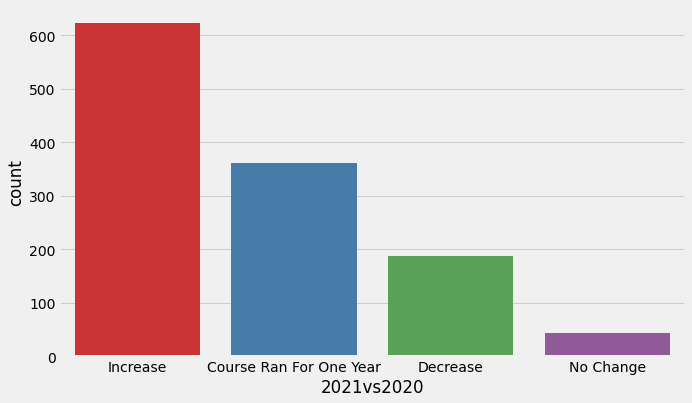

In [108]:
sns.countplot(data = allcourses_r1, x = '2021vs2020', palette = 'Set1')

<AxesSubplot:xlabel='2020vs2019', ylabel='count'>

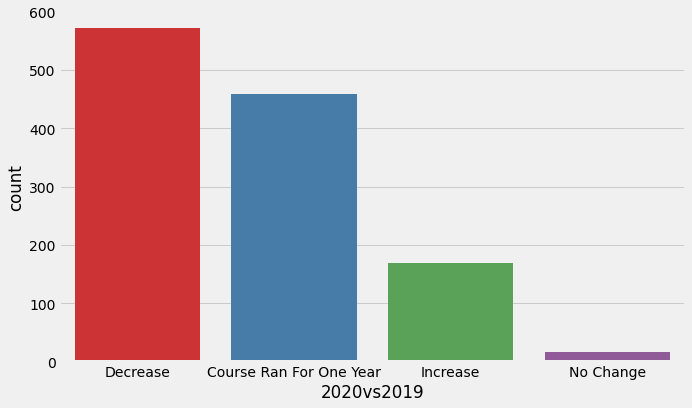

In [109]:
sns.countplot(data = allcourses_r1, x = '2020vs2019', palette = 'Set1')

<AxesSubplot:xlabel='2021vs2019', ylabel='count'>

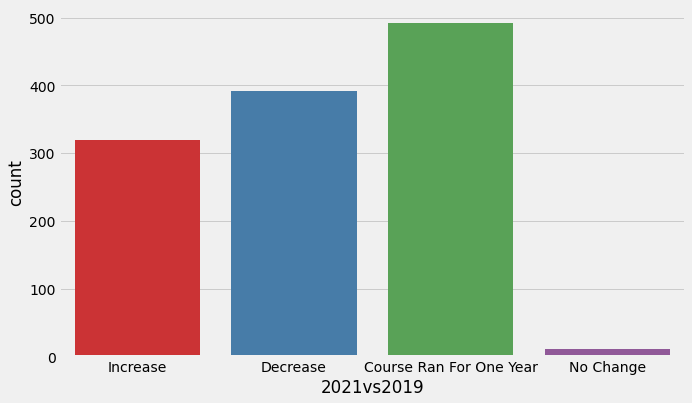

In [110]:
sns.countplot(data = allcourses_r1, x = '2021vs2019', palette = 'Set1')

In [111]:
summary_2021vs2020 = allcourses_r1['2021vs2020'].value_counts()
summary_2020vs2019 = allcourses_r1['2020vs2019'].value_counts()
summary_2021vs2019 = allcourses_r1['2021vs2019'].value_counts()

(-1.10544832799278,
 1.1105119901161458,
 -1.1081096738455078,
 1.1003861804036605)

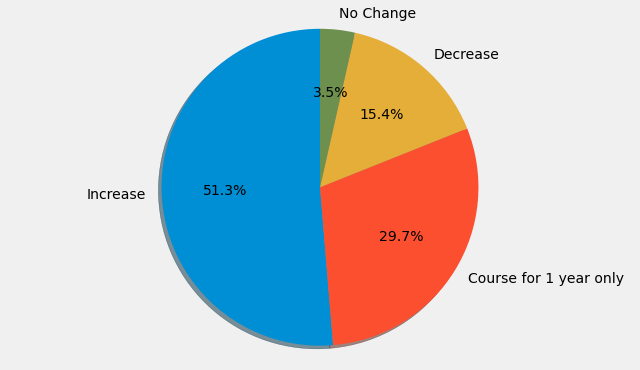

In [112]:
labels = 'Increase', 'Course for 1 year only', 'Decrease', 'No Change'

fig1, ax1 = plt.subplots()
ax1.pie(summary_2021vs2020,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

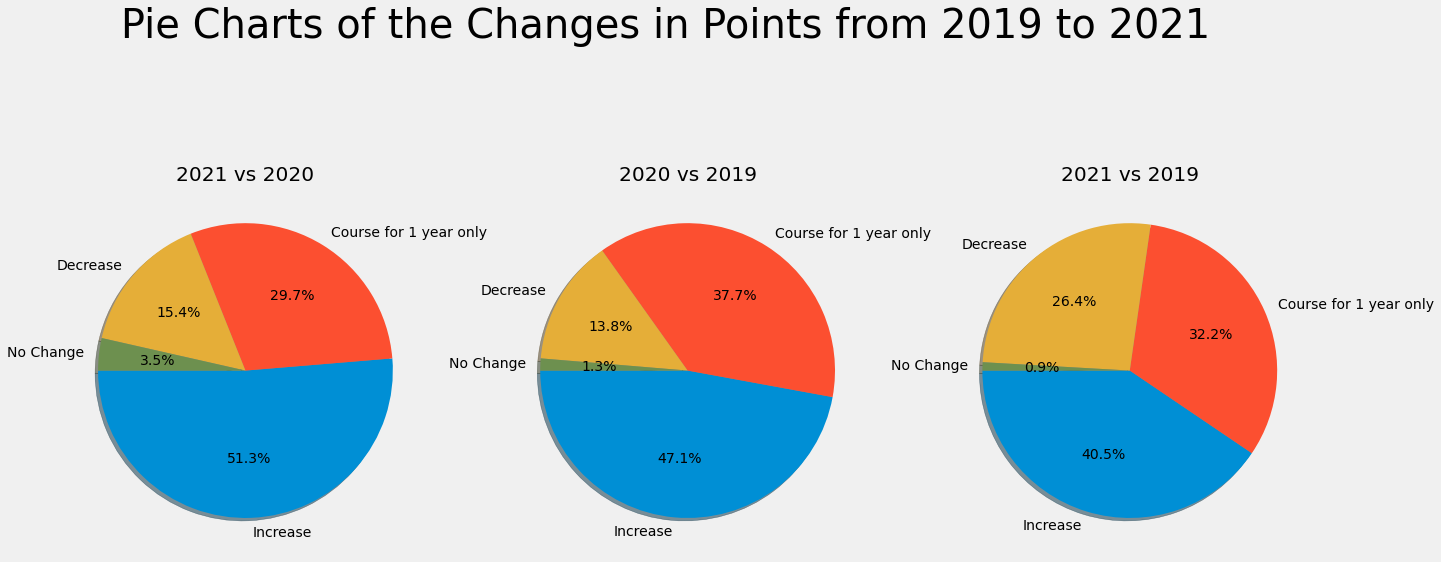

In [113]:
labels = 'Increase', 'Course for 1 year only', 'Decrease', 'No Change'

fig, ax = plt.subplots(1, 3, figsize = (20, 10))

fig.suptitle('Pie Charts of the Changes in Points from 2019 to 2021',
            fontsize = 40)

ax[0].set_title('2021 vs 2020')
ax[0].pie((summary_2021vs2020), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

ax[1].set_title('2020 vs 2019')
ax[1].pie((summary_2020vs2019), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

ax[2].set_title('2021 vs 2019')
ax[2].pie((summary_2021vs2019), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

plt.show()

In [114]:
medicine = ['Medicine (Undergraduate Entry - HPAT required)', 
            'Medicine  - Graduate Entry (GAMSAT required)',
           'Medicine - Undergraduate Entry (HPAT required)',
           'Medicine - Graduate Entry (GAMSAT required)',
           'Medicine (five year/six year course  HPAT required',
           'Podiatric Medicine',
           'Medicine  - Graduate Entry (GAMSAT required)',
           'Medicine - Undergraduate Entry (HPAT required)',
           'Medicine - Graduate Entry (GAMSAT required)',
           'Medicine (HPAT required)']

dfmedicine_r1 = allcourses_r1[allcourses_r1['title'].isin(medicine)]
dfmedicine_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019,2021vs2020,2020vs2019,2021vs2019
code,,,,,,,,,,,,,
CK701,Medicine (Undergraduate Entry - HPAT required),738.0,Test/Portfolio,731.0,,740.0,Test/Portfolio,7.0,-9.0,-2.0,Increase,Decrease,Decrease
CK791,Medicine - Graduate Entry (GAMSAT required),60.0,Randomly Selected,57.0,,59.0,Randomly Selected,3.0,-2.0,1.0,Increase,Decrease,Increase
DN400,Medicine - Undergraduate Entry (HPAT required),743.0,Randomly Selected,737.0,,745.0,Test/Portfolio,6.0,-8.0,-2.0,Increase,Decrease,Decrease
DN401,Medicine - Graduate Entry (GAMSAT required),61.0,Randomly Selected,NaN,,61.0,Randomly Selected,NaN,NaN,0.0,Course Ran For One Year,Course Ran For One Year,No Change
GY501,Medicine (five year/six year course HPAT requ...,737.0,Randomly Selected,728.0,,731.0,Randomly Selected,9.0,-3.0,6.0,Increase,Decrease,Increase
GY504,Podiatric Medicine,531.0,,443.0,,463.0,,88.0,-20.0,68.0,Increase,Decrease,Increase
LM101,Medicine - Graduate Entry (GAMSAT required),57.0,Randomly Selected,55.0,,57.0,Randomly Selected,2.0,-2.0,0.0,Increase,Decrease,No Change
RC001,Medicine - Undergraduate Entry (HPAT required),741.0,Test/Portfolio,733.0,,733.0,Test/Portfolio,8.0,0.0,8.0,Increase,No Change,Increase
RC101,Medicine - Graduate Entry (GAMSAT required),NaN,,NaN,,62.0,Test/Portfolio,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year


In [115]:
pd.options.mode.chained_assignment = None
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine (Undergraduate Entry - HPAT required)'], 'CK701')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine - Graduate Entry (GAMSAT required)'], 'CK791')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine - Undergraduate Entry (HPAT required)'], 'DN400')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine - Graduate Entry (GAMSAT required)'], 'DN401')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine (five year/six year course  HPAT required'], 'GY501')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Podiatric Medicine'], 'GY504')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine  - Graduate Entry (GAMSAT required)'], 'LM101')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine - Undergraduate Entry (HPAT required)'], 'RC001')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine - Graduate Entry (GAMSAT required)'], 'RC101')
dfmedicine_r1['title'] = dfmedicine_r1['title'].replace(['Medicine (HPAT required)'], 'TR051')
dfmedicine_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019,2021vs2020,2020vs2019,2021vs2019
code,,,,,,,,,,,,,
CK701,CK701,738.0,Test/Portfolio,731.0,,740.0,Test/Portfolio,7.0,-9.0,-2.0,Increase,Decrease,Decrease
CK791,LM101,60.0,Randomly Selected,57.0,,59.0,Randomly Selected,3.0,-2.0,1.0,Increase,Decrease,Increase
DN400,DN400,743.0,Randomly Selected,737.0,,745.0,Test/Portfolio,6.0,-8.0,-2.0,Increase,Decrease,Decrease
DN401,CK791,61.0,Randomly Selected,NaN,,61.0,Randomly Selected,NaN,NaN,0.0,Course Ran For One Year,Course Ran For One Year,No Change
GY501,GY501,737.0,Randomly Selected,728.0,,731.0,Randomly Selected,9.0,-3.0,6.0,Increase,Decrease,Increase
GY504,GY504,531.0,,443.0,,463.0,,88.0,-20.0,68.0,Increase,Decrease,Increase
LM101,LM101,57.0,Randomly Selected,55.0,,57.0,Randomly Selected,2.0,-2.0,0.0,Increase,Decrease,No Change
RC001,DN400,741.0,Test/Portfolio,733.0,,733.0,Test/Portfolio,8.0,0.0,8.0,Increase,No Change,Increase
RC101,CK791,NaN,,NaN,,62.0,Test/Portfolio,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year


<AxesSubplot:xlabel='title', ylabel='points_r1_2021-2020'>

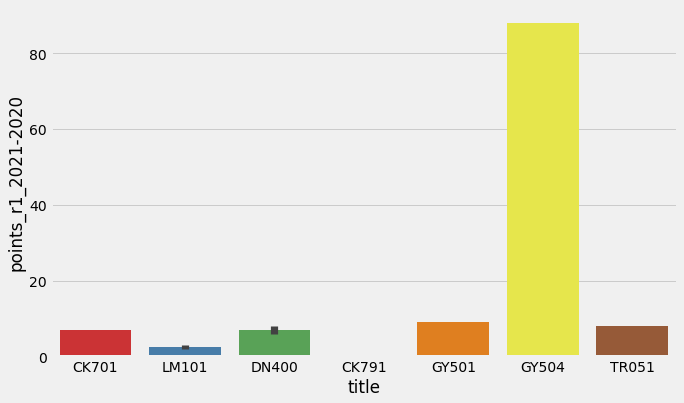

In [116]:
sns.barplot(data = dfmedicine_r1, x = 'title', y= 'points_r1_2021-2020', palette = 'Set1')

<AxesSubplot:xlabel='title', ylabel='points_r1_2020-2019'>

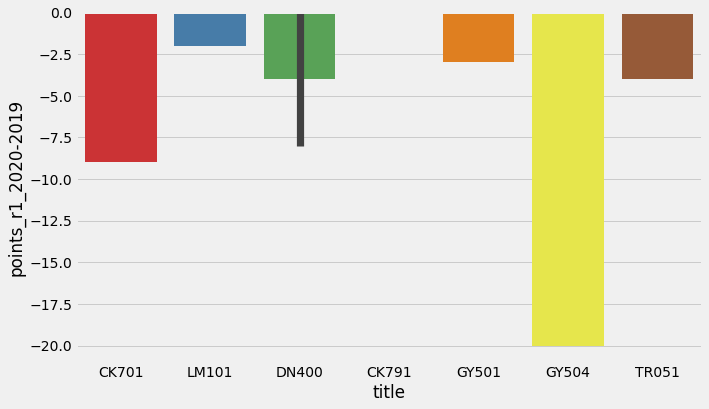

In [117]:
sns.barplot(data = dfmedicine_r1, x = 'title', y= 'points_r1_2020-2019', palette = 'Set1')

<AxesSubplot:xlabel='title', ylabel='points_r1_2021-2019'>

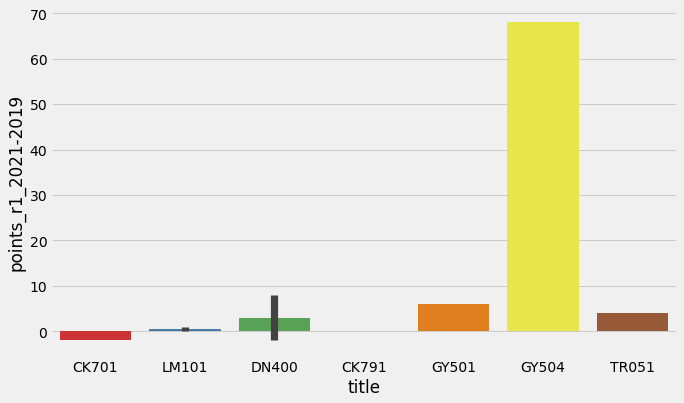

In [118]:
sns.barplot(data = dfmedicine_r1, x = 'title', y= 'points_r1_2021-2019', palette = 'Set1')

<AxesSubplot:xlabel='title', ylabel='points_r1_2021-2020'>

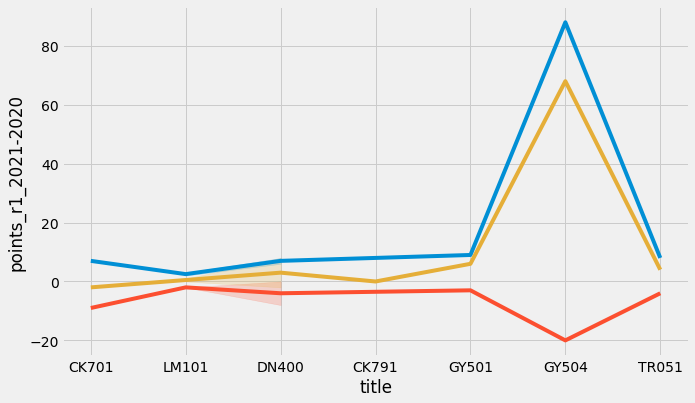

In [119]:
sns.lineplot(data = dfmedicine_r1, x = 'title', y= 'points_r1_2021-2020', palette = 'Set1')
sns.lineplot(data = dfmedicine_r1, x = 'title', y= 'points_r1_2020-2019', palette = 'Set1')
sns.lineplot(data = dfmedicine_r1, x = 'title', y= 'points_r1_2021-2019', palette = 'Set1')

In [120]:
dfmedicine_r1_compare = dfmedicine_r1.drop(dfmedicine_r1.columns[[1, 2, 3, 4, 5, 6, 10, 11, 12]], axis = 1)
dfmedicine_r1_compare

,title,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019
code,,,,
CK701,CK701,7.0,-9.0,-2.0
CK791,LM101,3.0,-2.0,1.0
DN400,DN400,6.0,-8.0,-2.0
DN401,CK791,NaN,NaN,0.0
GY501,GY501,9.0,-3.0,6.0
GY504,GY504,88.0,-20.0,68.0
LM101,LM101,2.0,-2.0,0.0
RC001,DN400,8.0,0.0,8.0
RC101,CK791,NaN,NaN,NaN


In [121]:
dfmedicine_r1_compare_melted = pd.melt(dfmedicine_r1_compare, id_vars = ['title'], var_name='cols', value_name='vals')
dfmedicine_r1_compare_melted

,title,cols,vals
0,CK701,points_r1_2021-2020,7.0
1,LM101,points_r1_2021-2020,3.0
2,DN400,points_r1_2021-2020,6.0
3,CK791,points_r1_2021-2020,NaN
4,GY501,points_r1_2021-2020,9.0
5,GY504,points_r1_2021-2020,88.0
6,LM101,points_r1_2021-2020,2.0
7,DN400,points_r1_2021-2020,8.0
8,CK791,points_r1_2021-2020,NaN
9,TR051,points_r1_2021-2020,8.0


<AxesSubplot:xlabel='cols', ylabel='vals'>

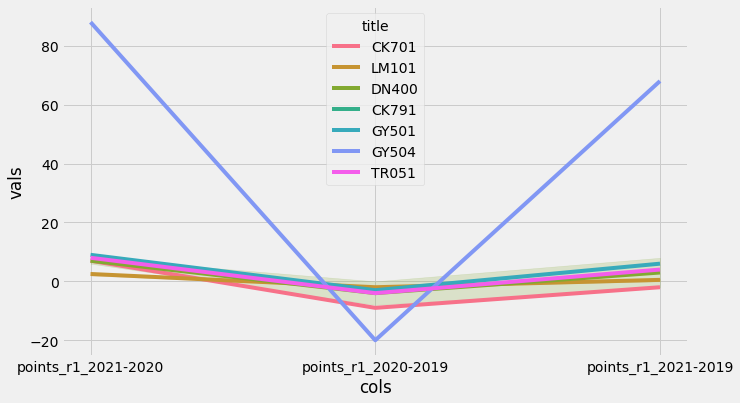

In [122]:
sns.lineplot(data = dfmedicine_r1_compare_melted, x = 'cols', y = 'vals', hue = 'title')

## References
***

[01][The official Python Regular Expressions Documentation](https://docs.python.org/3/library/re.html)<br>
[02][Camelot: PDF Table Extraction for Humans](https://camelot-py.readthedocs.io/en/master/)<br>
[03][How to Extract tabular data from PDF document using Camelot in Python](https://www.analyticsvidhya.com/blog/2020/08/how-to-extract-tabular-data-from-pdf-document-using-camelot-in-python/)<br>
[04][Camelot - Quickstart](https://camelot-py.readthedocs.io/en/master/user/quickstart.html)<br>
[05][Camelot - API Documentation](https://camelot-py.readthedocs.io/en/master/api.html)<br>
[06][Ghostscript](https://www.ghostscript.com/releases/gsdnld.html)<br>
[07][pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)<br>
[08][Stackoverflow - Merging two or more continuous tables from a list in Python](https://stackoverflow.com/questions/60082511/merging-two-or-more-continuous-tables-from-a-list-in-python)<br>
[09][Data to Fish - How to Convert Strings to Integers in Pandas DataFrame](https://datatofish.com/string-to-integer-dataframe/)<br>
[10][pandas - pandas.DataFrame.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)<br>
[11][GeeksforGeeks - Python | Pandas dataframe.replace()](https://www.geeksforgeeks.org/python-pandas-dataframe-replace/)<br>
[12][Shane Lynn - Delete Rows & Columns in DataFrames Quickly using Pandas Drop](https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/)<br>
[13][pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)<br>
[14][stackoverflow - Adding a column in pandas df using a function](https://stackoverflow.com/questions/40045632/adding-a-column-in-pandas-df-using-a-function)<br>
[15][www.jquery-az.com - etting current date by Python datetime now() function](https://www.jquery-az.com/python-datetime-now/)<br>
[16][https://strftime.org - Python strftime cheatsheet](https://strftime.org/)<br>
[17][GeeksforGeeks - How to rename columns in Pandas DataFrame](https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/)<br>
[][]()<br>
[][]()<br>
[][]()<br>
[][]()<br>
[][]()<br>
[][]()<br>
[][]()<br>
[][]()<br>

***
# End